In [1]:
# Import Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
color_pal = sns.color_palette('pastel')

In [2]:
df_train = pd.read_csv('train.csv')
df_test =  pd.read_csv('test.csv')
all_data = pd.concat((df_train.loc[:, 'MSSubClass':'SaleCondition'],
                     df_test.loc[:,'MSSubClass':'SaleCondition']))

## Preprocessing

In [3]:
# Remove Null Data
# Count total missing data
total = all_data.isnull().sum().sort_values(ascending= False)
percent = (all_data.isnull().sum()*100/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


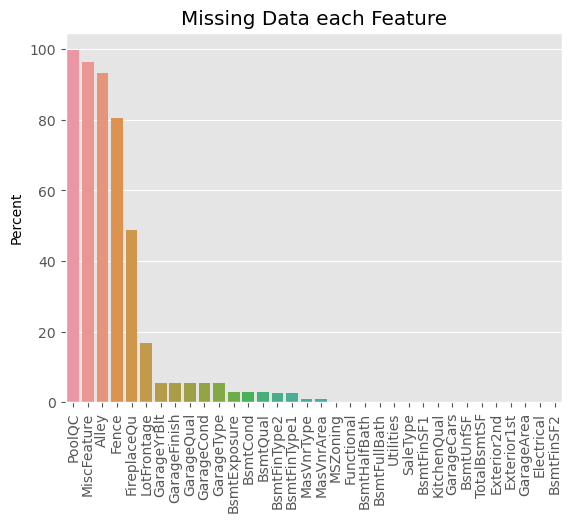

In [4]:
#Create a barplot
true_miss_data = missing_data.drop(missing_data[missing_data['Total']==0].index)
sns.barplot(data = true_miss_data, x = true_miss_data.index, y = true_miss_data.Percent)
plt.xticks(rotation = 90)
plt.title('Missing Data each Feature')
plt.show()

In [5]:
#Drop the columns with the most null value 
all_data = all_data.drop((missing_data[missing_data['Total']>80]).index, axis = 1)
all_data = all_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [6]:
# Make it sure there is no NAN data
total = all_data.isnull().sum().sort_values(ascending = False)
percent = (all_data.isnull().sum()*100/all_data.isnull().count()).sort_values(ascending = True)
data_ = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
data_.head()

,Total,Percent
MSSubClass,0,0.0
Heating,0,0.0
CentralAir,0,0.0
Electrical,0,0.0
1stFlrSF,0,0.0


In [7]:
#Let's check zero value each column
all_data[all_data[all_data.columns]==0].count().sort_values(ascending = False).head(20)

PoolArea         2906
3SsnPorch        2882
LowQualFinSF     2879
MiscVal          2816
BsmtHalfBath     2744
ScreenPorch      2663
BsmtFinSF2       2572
EnclosedPorch    2460
HalfBath         1834
MasVnrArea       1761
BsmtFullBath     1707
2ndFlrSF         1668
WoodDeckSF       1523
Fireplaces       1420
OpenPorchSF      1298
BsmtFinSF1        930
BsmtUnfSF         242
GarageArea        158
GarageCars        157
TotalBsmtSF        79
dtype: int64

In [8]:
from scipy.stats import skew
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skew_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skew_feats = skew_feats[skew_feats > 0.5]
print('Skew Features:')
skew_data = pd.DataFrame({'Skewness': skew_feats})
skew_data

Skew Features:


,Skewness
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146143
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.931594


In [9]:
#transform all data by using log1p
all_data[skew_feats.index] = np.log1p(all_data[skew_feats.index]) 

In [10]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_feats = skewed_feats[skewed_feats>0.5]
print('Skew in numerical features')
skewness_train = pd.DataFrame({'Skew':skewed_feats})
skewness_train.head(10)

Skew in numerical features


,Skew
PoolArea,14.998335
3SsnPorch,8.825256
LowQualFinSF,8.557690
MiscVal,5.213984
BsmtHalfBath,3.774762
KitchenAbvGr,3.520351
ScreenPorch,2.945905
BsmtFinSF2,2.462483
EnclosedPorch,1.961081
HalfBath,0.580692


In [11]:
all_data[all_data[all_data.columns]==0].count().sort_values (ascending = False).head(15)

PoolArea         2906
3SsnPorch        2882
LowQualFinSF     2879
MiscVal          2816
BsmtHalfBath     2744
ScreenPorch      2663
BsmtFinSF2       2572
EnclosedPorch    2460
HalfBath         1834
MasVnrArea       1761
BsmtFullBath     1707
2ndFlrSF         1668
WoodDeckSF       1523
Fireplaces       1420
OpenPorchSF      1298
dtype: int64

In [12]:
# Zero value doesn't conversted, so we delete it.
all_data = all_data.drop((skewness_train[skewness_train['Skew'] > 0.5]).index, axis = 1)

In [13]:
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewed_feats = skewed_feats[skewed_feats>0.5]
print('Skew in numerical features')
skewness_train = pd.DataFrame({'Skew':skewed_feats})
skewness_train.head(10)

Skew in numerical features


,Skew


## Create Prediction

In [14]:
X_train = all_data[:df_train.shape[0]]
X_test = all_data[df_train.shape[0]:]
y_train = df_train.SalePrice

In [15]:
print('X_train.shape:', X_train.shape)
print('X_test.shape', X_test.shape)

X_train.shape: (1460, 54)
X_test.shape (1459, 54)


In [16]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [17]:
categorical = X_train.select_dtypes(include = 'object').columns

sc = StandardScaler()

for col in categorical:
    lbl = LabelEncoder()
    lbl.fit(list(X_train[col].values))
    X_train[col] = lbl.transform(list(X_train[col].values))
    X_test[col] = lbl.transform(list(X_test[col].values))

C:\Users\HP\AppData\Local\Temp\ipykernel_8172\2699197197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = lbl.transform(list(X_train[col].values))
C:\Users\HP\AppData\Local\Temp\ipykernel_8172\2699197197.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = lbl.transform(list(X_test[col].values))
C:\Users\HP\AppData\Local\Temp\ipykernel_8172\2699197197.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [18]:
from sklearn.preprocessing import MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)
y_ = y_train/np.amax(y_train)

In [19]:
X_train_ss.shape

(1460, 54)

In [20]:
X_test_ss.shape

(1459, 54)

In [21]:
X_train_, X_val_test, y_train_, y_val_test = train_test_split(X_train_ss, y_, test_size=0.3)

In [22]:
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size = 0.5)

In [23]:
print(X_train_.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(1022, 54) (219, 54) (219, 54) (1460,) (219,) (219,)


In [24]:
model = Sequential([
    Dense(64, activation='relu', input_shape = (54,)),
    Dense(128, activation = 'relu'),
    Dense(128, activation  = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [25]:
model.compile(optimizer = 'sgd',
             loss = 'mse')

In [26]:
hist = model.fit(X_train_, y_train_,  epochs = 100, validation_data=(X_val,  y_val))

Epoch 1/100
32/32 [==============================] - 2s 13ms/step - loss: 0.0424 - val_loss: 0.0300
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.0229 - val_loss: 0.0203
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0160 - val_loss: 0.0166
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0130 - val_loss: 0.0149
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.0139
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0106 - val_loss: 0.0133
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 0.0128
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0123
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0090 - val_loss: 0.0119
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.0087 - val_loss: 0.0116
Epoch 11

In [27]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0050


0.005013239569962025

In [28]:
np.sqrt(model.evaluate(X_test, y_test))

7/7 [==============================] - 0s 2ms/step - loss: 0.0050


0.0708042341245354

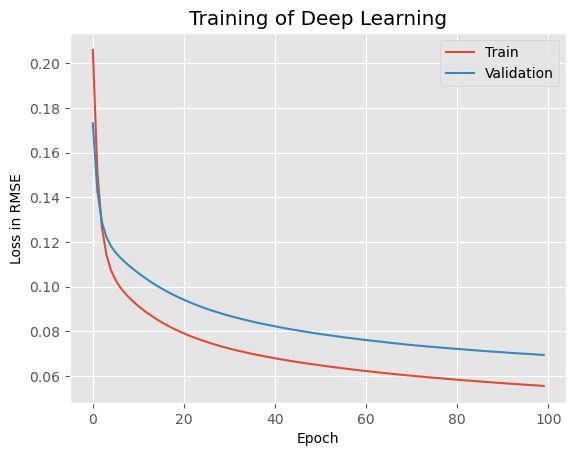

In [29]:
plt.plot(np.sqrt(hist.history['loss']))
plt.plot(np.sqrt(hist.history['val_loss']))
plt.xlabel('Epoch')
plt.ylabel('Loss in RMSE')
plt.legend(['Train','Validation'])
plt.title('Training of Deep Learning')
plt.show()

In [33]:
hist_ = model.fit(X_train_ss, y_)

46/46 [==============================] - 0s 2ms/step - loss: 0.0036


In [34]:
y_hat = model.predict(X_test_ss)
y_hat

46/46 [==============================] - 0s 2ms/step


array([[0.19322945],
       [0.25591245],
       [0.2755784 ],
       ...,
       [0.18142699],
       [0.2041995 ],
       [0.304388  ]], dtype=float32)

In [35]:
y_train_test = y_train[:y_hat.shape[0]]
y_hat2 = y_hat*np.amax(y_train_test)
y_hat2

array([[145888.23609054],
       [193213.90196681],
       [208061.69912219],
       ...,
       [136977.37522423],
       [154170.61716318],
       [229812.9299283 ]])

In [36]:
sub_df = pd.DataFrame({'ID':df_test.Id, 'SalePrice':y_hat2.flatten()})

In [37]:
sub_df.to_csv('NN_solution.csv', index = False)